In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")

In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')

In [4]:
data_by_month.index=index

In [5]:
data_by_month.head()

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54


In [6]:
data_by_month['month']=data_by_month.index.month
data_by_month['quarter']=data_by_month.index.quarter

In [7]:
data_by_month

,Truck,month,quarter
Date,,,
2011-01-31,39,1,1
2011-02-28,41,2,1
2011-03-31,57,3,1
2011-04-30,61,4,2
2011-05-31,54,5,2
...,...,...,...
2018-08-31,10,8,3
2018-09-30,27,9,3
2018-10-31,19,10,4


In [8]:
split_data=70
x_train=data_by_month.iloc[:split_data,1:].values
x_test=data_by_month.iloc[split_data:,1:].values
y_train=data_by_month.iloc[:split_data,0].values
y_test=data_by_month.iloc[split_data:,0].values

In [9]:
scaler=StandardScaler()

In [10]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
nn_model=Sequential()
nn_model.add(Dense(36,input_shape=(x_train.shape[1],)))
nn_model.add(Dense(18,activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss='mean_absolute_error')
nn_model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
3/3 [==============================] - 0s 51ms/step - loss: 32.4325 - val_loss: 22.9360
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 31.6138 - val_loss: 22.2299
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 30.9762 - val_loss: 21.2686
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 30.0462 - val_loss: 19.9819
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 28.8635 - val_loss: 18.2471
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 27.2888 - val_loss: 16.0235
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 25.2058 - val_loss: 14.5081
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 23.1313 - val_loss: 14.9888
Epoch 9/50
3/3 [==============================] - 0s 10ms/step - loss: 21.3072 - val_loss: 16.6332
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 20.4574 - val_loss: 17.7845
Epoch 11/50
3/3 [

In [12]:
y_pred=nn_model.predict(x_test)
comp=pd.DataFrame()

In [13]:
comp['y_test']=y_test
comp['y_pred']=y_pred
comp

,y_test,y_pred
0,15,28.055899
1,18,29.544720
2,26,37.684082
3,26,36.575104
4,29,35.466110
5,31,29.507780
6,28,29.024523
7,23,28.020229
8,21,20.931099
9,17,20.798531


In [14]:
mean_absolute_error(y_test,y_pred)

6.3527123377873345

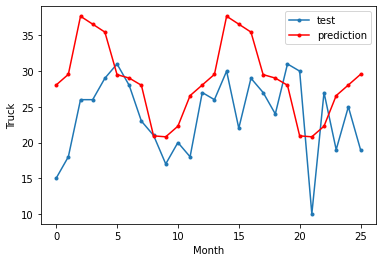

In [15]:
plt.plot(y_test, marker='.', label="test")
plt.plot(y_pred, 'r', marker='.',label="prediction")
plt.ylabel('Truck')
plt.xlabel('Month')
plt.legend()
plt.show();

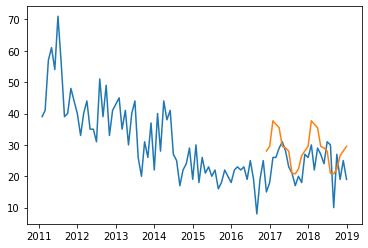

In [16]:
y_pred_df=pd.DataFrame(y_pred,columns=['Truck'])
y_pred_df.index=data_by_month.index[split_data:]
plt.plot(data_by_month['Truck'])
plt.plot(y_pred_df)